In [1]:
%load_ext autoreload
%autoreload 2
from Methods import sentenceSimilarityMethods,JobOffers,dataframeHelpers

In [2]:
import pandas as pd
import numpy as np

In [3]:
autoreload JobOffers,dataframeHelpers

In [4]:
# Only run this if you want to redo the translations
#JobOffers.writeTranslatedJobs(100)

In [5]:
slimmedActsDf = dataframeHelpers.buildActivitiesDFV26()

In [6]:
slimmedActsDf

,ACTIVITY_CONTENT,ACTIVITY_ID
0,Where and how are the information and data gai...,2
1,"Observing, receiving, and otherwise obtaining...",3
2,Research geological features or processes.,4
3,Conduct climatological research.,5
4,Investigate the environmental impact of indust...,6
...,...,...
283,Providing guidance and expert advice to manage...,290
284,Performing day-to-day administrative tasks suc...,291
285,Obtain permits.,292
286,"Recruiting, interviewing, selecting, hiring, ...",293


In [7]:
#got stuck here
jobsDf = dataframeHelpers.buildJobsDF("Data/output_V1.1.1000.translate.json")

In [8]:
#jobsDf.to_csv("1000TranslatedJobs.csv")

In [9]:
jobsDf

,JOB_ID,ISCO,JOB_CONTENT,ORIGINAL_CONTENT,TRANSLATED_JOBS,CANTON,COMPANY_SIZE
0,12220025,21420,[We are a successful and independent engineeri...,<p>Wir sind ein erfolgreiches und unabhängiges...,We are a successful and independent engineerin...,[BE],Kleinstunternehmen
1,10814567,21420,[We are a prestigious and successful engineeri...,Wir sind eine renommierte und erfolgreiche Ing...,We are a prestigious and successful engineerin...,[BE],Kleinstunternehmen
2,12401674,21420,[Bill Weyermann Partner AG has been producing ...,Bill Weyermann Partner AG erbringt seit über\n...,Bill Weyermann Partner AG has been producing e...,[BE],Kleinunternehmen
3,12473085,62100,[Administration Communale de Valderuzforstarti...,Administration communale de Val-de-RuzForstwar...,Administration Communale de Valderuzforstartin...,[NE],Kleinstunternehmen
4,12905109,26220;24210,[The Straumann Group is experiencing internati...,Le groupe Straumann connaît un succès internat...,The Straumann Group is experiencing internatio...,[BE],Mittelunternehmen
...,...,...,...,...,...,...,...
995,17126875,24210,[Vallorbe SA Metallurgical factories are recog...,<p>Les Usines Métallurgiques de Vallorbe SA (U...,Vallorbe SA Metallurgical factories are recogn...,[VD],Mittelunternehmen
996,17140922,43210;24210,[Back to Search Results Apply for this item OM...,<h2>Retour aux résultats de la recherche</h2>\...,Back to Search Results Apply for this item OME...,[BE],Grossunternehmen
997,17140923,24210,[Back to Search Results Apply for this item Om...,<h2>Retour aux résultats de la recherche</h2>\...,Back to Search Results Apply for this item Ome...,[BE],Grossunternehmen
998,17060287,24210,[You are here HomePlayController Quality HF Qu...,Vous êtes ici :AccueilEmploisContrôleur qualit...,You are here HomePlayController Quality HF Qua...,[BE],Kleinunternehmen


In [10]:
embeddings = dataframeHelpers.getEmbeddings(slimmedActsDf, jobsDf)

In [11]:
# Verify no na's
slimmedActsDf[slimmedActsDf["ACTIVITY_CONTENT"].isna()]


,ACTIVITY_CONTENT,ACTIVITY_ID


In [12]:
jobsSentences = np.array([y for x in jobsDf["JOB_CONTENT"] for y in x])

In [13]:
jobsDf = dataframeHelpers.addEmbeddingsToJobs(jobsDf, embeddings)
slimmedActsDf = dataframeHelpers.addEmbeddingsToActivities(slimmedActsDf, embeddings)

In [14]:
resultsDf = pd.DataFrame()

In [15]:
for label in ["JOB_ID", "JOB_SCORES"]:
    resultsDf[label] = jobsDf[label]

In [16]:
resultsDf = resultsDf.merge(slimmedActsDf, how = "cross")

In [17]:
resultsDf = resultsDf[["JOB_ID", "ACTIVITY_ID", "JOB_SCORES", "ACTIVITY_SCORES"]]

In [18]:
%time resultsDf["DISTANCES"] = resultsDf.apply(dataframeHelpers.distCalc, args=["ACTIVITY_SCORES"], axis=1)

CPU times: user 9min 4s, sys: 6.76 s, total: 9min 10s
Wall time: 10min 34s


In [19]:
resultsDf["LOWEST_DISTANCE"] = resultsDf.apply(dataframeHelpers.minDistanceFinder, axis =1)
resultsDf["LOWEST_DISTANCE_SENTENCE"] = resultsDf.apply(dataframeHelpers.minDistanceSentence, args=[jobsDf], axis =1)

In [20]:
resultsDf

,JOB_ID,ACTIVITY_ID,JOB_SCORES,ACTIVITY_SCORES,DISTANCES,LOWEST_DISTANCE,LOWEST_DISTANCE_SENTENCE
0,12220025,2,"((tf.Tensor(-0.04822776, shape=(), dtype=float...","(tf.Tensor(0.027285306, shape=(), dtype=float3...","[0.9204563921292741, 0.9612990152653925, 0.896...",0.670784,You want to gain experience in configuration ...
1,12220025,3,"((tf.Tensor(-0.04822776, shape=(), dtype=float...","(tf.Tensor(0.07172423, shape=(), dtype=float32...","[1.1060239668309446, 0.981433545431948, 0.9602...",0.730214,Further information and application We are at...
2,12220025,4,"((tf.Tensor(-0.04822776, shape=(), dtype=float...","(tf.Tensor(0.045720328, shape=(), dtype=float3...","[1.0675544813260374, 0.9523585451595346, 0.962...",0.807079,Haldi Design AG Schönried
3,12220025,5,"((tf.Tensor(-0.04822776, shape=(), dtype=float...","(tf.Tensor(0.05692438, shape=(), dtype=float32...","[1.0622159631191077, 0.9687162721640906, 0.887...",0.866480,Haldi Design AG Schönried
4,12220025,6,"((tf.Tensor(-0.04822776, shape=(), dtype=float...","(tf.Tensor(0.07220104, shape=(), dtype=float32...","[1.0261805174390688, 0.8907389985075571, 0.903...",0.873732,You want to gain experience in configuration ...
...,...,...,...,...,...,...,...
287995,14795850,290,"((tf.Tensor(0.018810535, shape=(), dtype=float...","(tf.Tensor(0.027627833, shape=(), dtype=float3...","[0.9140721754527907, 1.0835484165079878, 1.110...",0.754286,Exposure to manufacturing operations and or ...
287996,14795850,291,"((tf.Tensor(0.018810535, shape=(), dtype=float...","(tf.Tensor(-0.008161316, shape=(), dtype=float...","[0.8664177599603826, 1.0288245236392892, 1.128...",0.860321,Lead the adoption and maintenance of applica...
287997,14795850,292,"((tf.Tensor(0.018810535, shape=(), dtype=float...","(tf.Tensor(0.019920168, shape=(), dtype=float3...","[1.0274987276670637, 0.9213418989515674, 0.982...",0.784405,Drive the implementation of the required act...
287998,14795850,293,"((tf.Tensor(0.018810535, shape=(), dtype=float...","(tf.Tensor(0.0046779006, shape=(), dtype=float...","[0.7686764253344993, 0.9782356527467863, 1.098...",0.744638,I came for the job I stay for the culture LIALC


In [21]:
resultsDf["AVERAGE_DISTANCE_3SENT"] = resultsDf.apply(dataframeHelpers.averageNSentences, args=[3], axis=1)

In [22]:
column_names = ["JOB_ID", "ISCO", "TRANSLATED_JOBS", "TOP_ACTIVITY_MATCHES", "TOP_ACTIVITY_IDS", "BEST_ACTIVITY_MATCH_3SENT", "BEST_ACTIVITY_ID_3SENT", "BEST_ACTIVITY_MATCH_1SENT", "BEST_ACTIVITY_ID_1SENT", "LOWEST_DISTANCE", ]

In [23]:
topResultsDf = pd.DataFrame(columns = column_names)

In [24]:
for label in ["JOB_ID", "ISCO", "TRANSLATED_JOBS", "ORIGINAL_CONTENT"]:
    topResultsDf[label] = jobsDf[label]

In [25]:
#added this
cutoff = resultsDf["AVERAGE_DISTANCE_3SENT"].mean() - resultsDf["AVERAGE_DISTANCE_3SENT"].std()
print("The cutoff is mean-std for all the average 3 sent. Value is", cutoff)

The cutoff is mean-std for all the average 3 sent. Value is 0.8491833477833243


In [26]:
topResultsDf

,JOB_ID,ISCO,TRANSLATED_JOBS,TOP_ACTIVITY_MATCHES,TOP_ACTIVITY_IDS,BEST_ACTIVITY_MATCH_3SENT,BEST_ACTIVITY_ID_3SENT,BEST_ACTIVITY_MATCH_1SENT,BEST_ACTIVITY_ID_1SENT,LOWEST_DISTANCE,ORIGINAL_CONTENT
0,12220025,21420,We are a successful and independent engineerin...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<p>Wir sind ein erfolgreiches und unabhängiges...
1,10814567,21420,We are a prestigious and successful engineerin...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wir sind eine renommierte und erfolgreiche Ing...
2,12401674,21420,Bill Weyermann Partner AG has been producing e...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bill Weyermann Partner AG erbringt seit über\n...
3,12473085,62100,Administration Communale de Valderuzforstartin...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Administration communale de Val-de-RuzForstwar...
4,12905109,26220;24210,The Straumann Group is experiencing internatio...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Le groupe Straumann connaît un succès internat...
...,...,...,...,...,...,...,...,...,...,...,...
995,17126875,24210,Vallorbe SA Metallurgical factories are recogn...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<p>Les Usines Métallurgiques de Vallorbe SA (U...
996,17140922,43210;24210,Back to Search Results Apply for this item OME...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<h2>Retour aux résultats de la recherche</h2>\...
997,17140923,24210,Back to Search Results Apply for this item Ome...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<h2>Retour aux résultats de la recherche</h2>\...
998,17060287,24210,You are here HomePlayController Quality HF Qua...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vous êtes ici :AccueilEmploisContrôleur qualit...


In [27]:
topResultsDf["BEST_ACTIVITY_MATCH_1SENT"] = topResultsDf.apply(dataframeHelpers.bestMatchReturn, args=(resultsDf, slimmedActsDf, "ACTIVITY_ID", "LOWEST_DISTANCE", "ACTIVITY_CONTENT"), axis=1)
topResultsDf["BEST_ACTIVITY_MATCH_3SENT"] = topResultsDf.apply(dataframeHelpers.bestMatchReturn, args=(resultsDf, slimmedActsDf, "ACTIVITY_ID", "AVERAGE_DISTANCE_3SENT", "ACTIVITY_CONTENT"), axis=1)
topResultsDf["BEST_ACTIVITY_ID_1SENT"] = topResultsDf.apply(dataframeHelpers.bestMatchReturn, args=(resultsDf, slimmedActsDf, "ACTIVITY_ID", "LOWEST_DISTANCE", "ACTIVITY_ID"), axis=1)
topResultsDf["BEST_ACTIVITY_ID_3SENT"] = topResultsDf.apply(dataframeHelpers.bestMatchReturn, args=(resultsDf, slimmedActsDf, "ACTIVITY_ID", "AVERAGE_DISTANCE_3SENT", "ACTIVITY_ID"), axis=1)
topResultsDf["AVERAGE_DISTANCE_3SENT"] = topResultsDf.apply(dataframeHelpers.bestMatchAttributeReturn, args=(resultsDf, "AVERAGE_DISTANCE_3SENT", "AVERAGE_DISTANCE_3SENT"), axis=1)
topResultsDf["LOWEST_DISTANCE"] = topResultsDf.apply(dataframeHelpers.bestMatchAttributeReturn, args=(resultsDf, "LOWEST_DISTANCE", "LOWEST_DISTANCE"), axis=1)


In [28]:
topResultsDf["DISTANCES"] = topResultsDf.apply(dataframeHelpers.bestMatchAttributeReturn, args=(resultsDf, "AVERAGE_DISTANCE_3SENT", "DISTANCES"), axis=1)

In [29]:
topResultsDf["TOP_ACTIVITY_IDS"] = topResultsDf.apply(dataframeHelpers.bestNMatchReturn, args=(resultsDf, slimmedActsDf, "ACTIVITY_ID", "AVERAGE_DISTANCE_3SENT", "ACTIVITY_ID", 10, cutoff), axis=1)
topResultsDf["TOP_ACTIVITY_MATCHES"] = topResultsDf.apply(dataframeHelpers.bestNMatchReturn, args=(resultsDf, slimmedActsDf, "ACTIVITY_ID", "AVERAGE_DISTANCE_3SENT", "ACTIVITY_CONTENT", 10, cutoff), axis=1)
topResultsDf

,JOB_ID,ISCO,TRANSLATED_JOBS,TOP_ACTIVITY_MATCHES,TOP_ACTIVITY_IDS,BEST_ACTIVITY_MATCH_3SENT,BEST_ACTIVITY_ID_3SENT,BEST_ACTIVITY_MATCH_1SENT,BEST_ACTIVITY_ID_1SENT,LOWEST_DISTANCE,ORIGINAL_CONTENT,AVERAGE_DISTANCE_3SENT,DISTANCES
0,12220025,21420,We are a successful and independent engineerin...,[Manage engineering or construction activities...,"[257, 144, 112, 163, 286, 2, 155, 122, 111, 62]",Manage engineering or construction activities.,257,Manage engineering or construction activities.,257,0.578821,<p>Wir sind ein erfolgreiches und unabhängiges...,0.646740,"[0.791151860305631, 0.6139824744405065, 0.7474..."
1,10814567,21420,We are a prestigious and successful engineerin...,[Manage engineering or construction activities...,"[257, 286, 112, 141, 185, 282, 211, 196, 55, 119]",Manage engineering or construction activities.,257,Manage engineering or construction activities.,257,0.589803,Wir sind eine renommierte und erfolgreiche Ing...,0.683254,"[0.7649652613026601, 0.9211098753114915, 0.589..."
2,12401674,21420,Bill Weyermann Partner AG has been producing e...,[Manage engineering or construction activities...,"[257, 286, 112, 111, 155, 263, 134, 166, 185, ...",Manage engineering or construction activities.,257,Design civil structures or systems.,112,0.565322,Bill Weyermann Partner AG erbringt seit über\n...,0.663720,"[0.7439958773780513, 0.9263891150197031, 0.743..."
3,12473085,62100,Administration Communale de Valderuzforstartin...,[],[],Design energy-efficient equipment or systems.,142,"Identifying the educational needs of others, ...",259,0.848921,Administration communale de Val-de-RuzForstwar...,0.891762,"[0.9356160450837294, 0.8795060919640024, 1.057..."
4,12905109,26220;24210,The Straumann Group is experiencing internatio...,[Develop systems or practices to mitigate or r...,"[113, 155, 93, 255, 145, 283, 95, 273, 233, 280]",Develop systems or practices to mitigate or re...,113,Develop systems or practices to mitigate or re...,113,0.572145,Le groupe Straumann connaît un succès internat...,0.695611,"[0.9690081921160806, 0.8551876970030758, 0.933..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,17126875,24210,Vallorbe SA Metallurgical factories are recogn...,[Monitor operational procedures in technical e...,"[43, 219, 143, 192, 139, 182, 193, 291, 21, 59]",Monitor operational procedures in technical en...,43,Monitor operational procedures in technical en...,43,0.649720,<p>Les Usines Métallurgiques de Vallorbe SA (U...,0.733135,"[0.9126520196482818, 1.0343191114672525, 1.001..."
996,17140922,43210;24210,Back to Search Results Apply for this item OME...,[ Monitoring and controlling resources and ove...,"[294, 144, 220, 264, 291, 145, 12, 155, 45, 14]",Monitoring and controlling resources and over...,294,Monitoring and controlling resources and over...,294,0.604909,<h2>Retour aux résultats de la recherche</h2>\...,0.704711,"[0.6593238439083888, 0.604909013354844, 0.8498..."
997,17140923,24210,Back to Search Results Apply for this item Ome...,[Keeping up-to-date technically and applying n...,"[144, 233, 276, 145, 14, 259, 220, 83, 294, 155]",Keeping up-to-date technically and applying ne...,144,Keeping up-to-date technically and applying ne...,144,0.627097,<h2>Retour aux résultats de la recherche</h2>\...,0.734013,"[0.8638948099490504, 0.9536190593418855, 0.786..."
998,17060287,24210,You are here HomePlayController Quality HF Qua...,[],[],Consult with other professionals on green issues.,231,"Servicing, repairing, adjusting, and testing m...",198,0.800539,Vous êtes ici :AccueilEmploisContrôleur qualit...,0.883143,"[0.9038956281381038, 0.967039255609935, 0.8870..."


In [30]:
annotatedJobs200 = pd.read_csv("Data/AnnotatedJobs200.csv", sep=";")

In [31]:
topResultsDf["GREEN_IDENTITY"] = annotatedJobs200["GREEN_IDENTITY"].astype('bool')

In [32]:
topResultsDf = topResultsDf.sort_values(axis=0, by="AVERAGE_DISTANCE_3SENT")

,JOB_ID,ISCO,TRANSLATED_JOBS,TOP_ACTIVITY_MATCHES,TOP_ACTIVITY_IDS,BEST_ACTIVITY_MATCH_3SENT,BEST_ACTIVITY_ID_3SENT,BEST_ACTIVITY_MATCH_1SENT,BEST_ACTIVITY_ID_1SENT,LOWEST_DISTANCE,ORIGINAL_CONTENT,AVERAGE_DISTANCE_3SENT,DISTANCES,GREEN_IDENTITY
187,14597286,21420;21610,Renovation projects in the Hospital Thun,[Develop environmental restoration project pla...,"[149, 151, 163, 154, 274, 148, 172, 196, 166, ...",Develop environmental restoration project plans.,149,Develop environmental restoration project plans.,149,0.498919,Sanierungsprojekte im Spital Thun,0.498919,[0.49891875168609423],False
516,13705584,21430,Environment Specialist 1260 Prangins Nyon A...,[Monitor operational procedures in technical e...,"[43, 57, 14, 60, 58, 32, 59, 268, 70, 29]",Monitor operational procedures in technical en...,43,Monitor operational procedures in technical en...,43,0.466092,Environment Specialist\n\n\n1260 Prangins (Nyo...,0.512979,"[0.9377624357824149, 1.032226882861376, 0.9981...",NaN
448,18228182,24210,For the world take care of the individual. Thi...,"[Install testing or monitoring equipment., Ana...","[170, 89, 198, 55, 83, 204, 212, 11, 195, 59]",Install testing or monitoring equipment.,170,Analyze equipment test data.,89,0.492857,<b></b>\n<br>\n<b>Für&nbsp;die Welt sorgen</b>...,0.523962,"[1.0667774702437804, 1.0771327206256411, 1.100...",NaN
566,14008360,24210,Head of Quality Medical device 1006 Lausann...,[Analyze environmental regulations to ensure o...,"[70, 57, 59, 83, 139, 264, 227, 255, 294, 292]",Analyze environmental regulations to ensure or...,70,Assess compliance with environmental standards...,57,0.453538,Head of Quality - Medical device\n\n\n1006 Lau...,0.552417,"[0.8294725777686398, 0.9583480870790514, 0.801...",NaN
808,17348939,31320,Disposal and recycling collects or disposing s...,[Clean materials in preparation for recycling....,"[172, 183, 152, 187, 162, 176, 157, 288, 165, ...",Clean materials in preparation for recycling.,172,Plan recycling or waste disposal programs.,152,0.354714,"Entsorgung und Recycling sammelt, verwertet od...",0.558028,"[0.4807437560817426, 0.44395202057361616, 0.74...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,13460158,61300,Christina Steiner Daniel Billandwirtin Efzutig...,[],[],"Encouraging and building mutual trust, respect...",258,Analyzing information and evaluating results t...,95,0.849121,Christina Steiner & Daniel BillLandwirt/in EFZ...,0.919110,"[0.9450703376400407, 1.009534078332231, 1.0143...",False
779,15155247,24210,University Hospitals of Geneva Evaluate this c...,[],[],"Recruiting, interviewing, selecting, hiring, ...",293,Process feedstock for biological production ac...,175,0.790417,Hôpitaux Universitaires de Genève\n\nEvaluer c...,0.919566,"[0.8898503567193763, 1.0301823102662648, 0.838...",NaN
22,12720277,61300,Places LiBres à Consules Surrel's URL CRIDESSO...,[],[],Communicating with people outside the organiz...,229,Evaluate sites for potential green installations.,47,0.833808,Places libres à consulter sur lien URL ci-dess...,0.922401,"[1.0225591037358874, 1.0889960929545563, 0.931...",False
758,15116596,21620,This contribution is unfortunately no longer a...,[],[],Recommend green solutions.,283,Analyze equipment test data.,89,0.751996,Dieser Beitrag ist leider nicht mehr zugänglic...,0.925728,"[0.9543677722129176, 0.8372983745531878, 0.985...",NaN


In [34]:
#topResultsDf.to_csv("PrelimActsResults200V26.csv")

In [35]:
import matplotlib.pyplot as plt

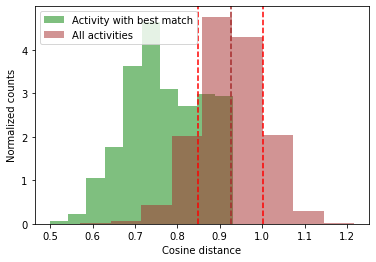

In [43]:
plt.hist(topResultsDf["AVERAGE_DISTANCE_3SENT"], color = 'green', density=True, label="Activity with best match", alpha=0.5)
plt.hist(resultsDf["AVERAGE_DISTANCE_3SENT"], color = 'brown', density=True, label="All activities", alpha=0.5)
plt.xlabel("Cosine distance")
plt.ylabel("Normalized counts")
plt.axvline(np.mean(resultsDf["AVERAGE_DISTANCE_3SENT"]), color='brown', linestyle='dashed')
plt.axvline(resultsDf["AVERAGE_DISTANCE_3SENT"].mean()+resultsDf["AVERAGE_DISTANCE_3SENT"].std(), color='red', linestyle='dashed')
plt.axvline(resultsDf["AVERAGE_DISTANCE_3SENT"].mean()-resultsDf["AVERAGE_DISTANCE_3SENT"].std(), color='red', linestyle='dashed')
plt.legend()

In [44]:
cutoff = resultsDf["AVERAGE_DISTANCE_3SENT"].mean() - resultsDf["AVERAGE_DISTANCE_3SENT"].std()
print("The cutoff is mean-std for all the average 3 sent. Value is", cutoff)

The cutoff is mean-std for all the average 3 sent. Value is 0.8491833477833243


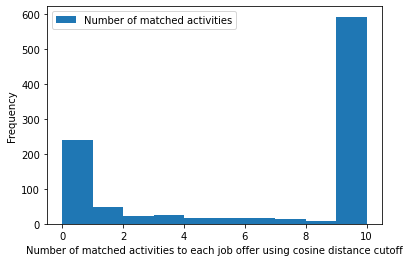

In [45]:
plt.hist([len(x) for x in topResultsDf["TOP_ACTIVITY_IDS"]], label="Number of matched activities")
plt.xlabel('Number of matched activities to each job offer using cosine distance cutoff')
plt.ylabel('Frequency')
plt.legend()

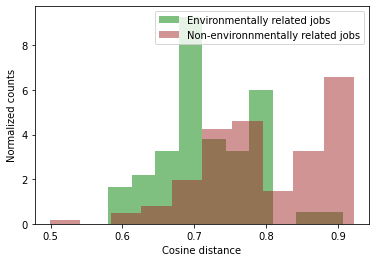

In [37]:
plt.hist(topResultsDf["AVERAGE_DISTANCE_3SENT"][topResultsDf["GREEN_IDENTITY"] == 1.0], label="Environmentally related jobs", color='green', density=True, alpha=0.5)
plt.hist(topResultsDf["AVERAGE_DISTANCE_3SENT"][topResultsDf["GREEN_IDENTITY"] == 0.], label="Non-environnmentally related jobs", color='brown', density=True, alpha=0.5)
plt.xlabel("Cosine distance")
plt.ylabel("Normalized counts")
plt.legend()

In [ ]:
plt.hist(topResultsDf["AVERAGE_DISTANCE_3SENT"][topResultsDf["GREEN_IDENTITY"] == 1.0], label="Environmentally related jobs", color='green', density=True, alpha=0.5)
plt.hist(topResultsDf["AVERAGE_DISTANCE_3SENT"][topResultsDf["GREEN_IDENTITY"] == 0.], label="Non-environnmentally related jobs", color='brown', density=True, alpha=0.5)
plt.xlabel("Cosine distance")
plt.ylabel("Normalized counts")
plt.legend()

In [46]:
topResultsDf

,JOB_ID,ISCO,TRANSLATED_JOBS,TOP_ACTIVITY_MATCHES,TOP_ACTIVITY_IDS,BEST_ACTIVITY_MATCH_3SENT,BEST_ACTIVITY_ID_3SENT,BEST_ACTIVITY_MATCH_1SENT,BEST_ACTIVITY_ID_1SENT,LOWEST_DISTANCE,ORIGINAL_CONTENT,AVERAGE_DISTANCE_3SENT,DISTANCES,GREEN_IDENTITY
187,14597286,21420;21610,Renovation projects in the Hospital Thun,[Develop environmental restoration project pla...,"[149, 151, 163, 154, 274, 148, 172, 196, 166, ...",Develop environmental restoration project plans.,149,Develop environmental restoration project plans.,149,0.498919,Sanierungsprojekte im Spital Thun,0.498919,[0.49891875168609423],False
516,13705584,21430,Environment Specialist 1260 Prangins Nyon A...,[Monitor operational procedures in technical e...,"[43, 57, 14, 60, 58, 32, 59, 268, 70, 29]",Monitor operational procedures in technical en...,43,Monitor operational procedures in technical en...,43,0.466092,Environment Specialist\n\n\n1260 Prangins (Nyo...,0.512979,"[0.9377624357824149, 1.032226882861376, 0.9981...",NaN
448,18228182,24210,For the world take care of the individual. Thi...,"[Install testing or monitoring equipment., Ana...","[170, 89, 198, 55, 83, 204, 212, 11, 195, 59]",Install testing or monitoring equipment.,170,Analyze equipment test data.,89,0.492857,<b></b>\n<br>\n<b>Für&nbsp;die Welt sorgen</b>...,0.523962,"[1.0667774702437804, 1.0771327206256411, 1.100...",NaN
566,14008360,24210,Head of Quality Medical device 1006 Lausann...,[Analyze environmental regulations to ensure o...,"[70, 57, 59, 83, 139, 264, 227, 255, 294, 292]",Analyze environmental regulations to ensure or...,70,Assess compliance with environmental standards...,57,0.453538,Head of Quality - Medical device\n\n\n1006 Lau...,0.552417,"[0.8294725777686398, 0.9583480870790514, 0.801...",NaN
808,17348939,31320,Disposal and recycling collects or disposing s...,[Clean materials in preparation for recycling....,"[172, 183, 152, 187, 162, 176, 157, 288, 165, ...",Clean materials in preparation for recycling.,172,Plan recycling or waste disposal programs.,152,0.354714,"Entsorgung und Recycling sammelt, verwertet od...",0.558028,"[0.4807437560817426, 0.44395202057361616, 0.74...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,13460158,61300,Christina Steiner Daniel Billandwirtin Efzutig...,[],[],"Encouraging and building mutual trust, respect...",258,Analyzing information and evaluating results t...,95,0.849121,Christina Steiner & Daniel BillLandwirt/in EFZ...,0.919110,"[0.9450703376400407, 1.009534078332231, 1.0143...",False
779,15155247,24210,University Hospitals of Geneva Evaluate this c...,[],[],"Recruiting, interviewing, selecting, hiring, ...",293,Process feedstock for biological production ac...,175,0.790417,Hôpitaux Universitaires de Genève\n\nEvaluer c...,0.919566,"[0.8898503567193763, 1.0301823102662648, 0.838...",NaN
22,12720277,61300,Places LiBres à Consules Surrel's URL CRIDESSO...,[],[],Communicating with people outside the organiz...,229,Evaluate sites for potential green installations.,47,0.833808,Places libres à consulter sur lien URL ci-dess...,0.922401,"[1.0225591037358874, 1.0889960929545563, 0.931...",False
758,15116596,21620,This contribution is unfortunately no longer a...,[],[],Recommend green solutions.,283,Analyze equipment test data.,89,0.751996,Dieser Beitrag ist leider nicht mehr zugänglic...,0.925728,"[0.9543677722129176, 0.8372983745531878, 0.985...",NaN


In [38]:
topResultsDf[topResultsDf["AVERAGE_DISTANCE_3SENT"] < 0.85].to_csv("PrelimResultsActs200V26_GoodMatches.csv")

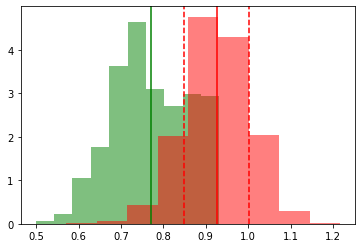

In [39]:
plt.hist(topResultsDf["AVERAGE_DISTANCE_3SENT"], label="Avg. of top 3 matches (best matched activity)", alpha=0.5, color = 'green', density=True)
plt.hist(resultsDf["AVERAGE_DISTANCE_3SENT"], label="Avg. of top 3 matches (all activities)", color='red', alpha=0.5, linestyle='dashed', density=True)
plt.axvline(topResultsDf["AVERAGE_DISTANCE_3SENT"].mean(), color='green')
plt.axvline(resultsDf["AVERAGE_DISTANCE_3SENT"].mean(), color='red')
plt.axvline(resultsDf["AVERAGE_DISTANCE_3SENT"].mean()+resultsDf["AVERAGE_DISTANCE_3SENT"].std(), color='red', linestyle='dashed')
plt.axvline(resultsDf["AVERAGE_DISTANCE_3SENT"].mean()-resultsDf["AVERAGE_DISTANCE_3SENT"].std(), color='red', linestyle='dashed')
#plt.legend()

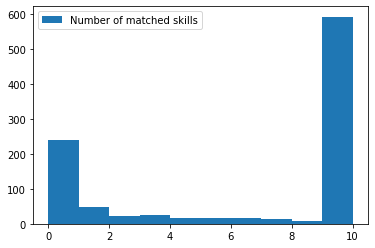

In [40]:
plt.hist([len(x) for x in topResultsDf["TOP_ACTIVITY_IDS"]], label="Number of matched skills")
plt.legend()

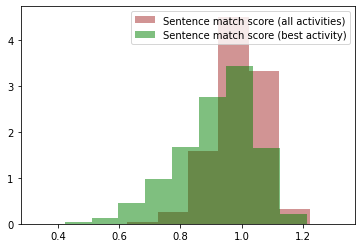

In [41]:
plt.hist([x for y in resultsDf["DISTANCES"] for x in y], label="Sentence match score (all activities)", density=True, alpha=0.5, color = 'brown')
plt.hist([x for y in topResultsDf["DISTANCES"] for x in y], label="Sentence match score (best activity)", density=True, alpha=0.5, color = 'green')
plt.legend()